In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("global-data-on-sustainable-energy.csv")
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [3]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [4]:
a = np.zeros(21, dtype="int") 
y = np.zeros(21, dtype="int")


for i in range(21):
    a[i] = len(data[data["Year"] == 2000+i])
    y[i] = 2000+i

Country_Amount = pd.DataFrame({"Year":y, "Amount":a})

Country_Amount

,Year,Amount
0,2000,173
1,2001,172
2,2002,172
3,2003,172
4,2004,172
5,2005,172
6,2006,172
7,2007,174
8,2008,174
9,2009,174


In [5]:
data["Entity"].value_counts()

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

In [6]:
entity_counts = data["Entity"].value_counts()

eligible_entities = entity_counts[entity_counts == 21].index
Eligible = data[data["Entity"].isin(eligible_entities)]

ineligible_entities = entity_counts[entity_counts != 21].index
Ineligible = data[data["Entity"].isin(ineligible_entities)]

In [7]:
Ineligible["Entity"].value_counts()

Entity
Montenegro       14
Serbia           14
South Sudan       8
French Guiana     1
Name: count, dtype: int64

In [8]:
Eligible["Entity"].value_counts().sort_index()

Entity
Afghanistan            21
Albania                21
Algeria                21
Angola                 21
Antigua and Barbuda    21
                       ..
Uzbekistan             21
Vanuatu                21
Yemen                  21
Zambia                 21
Zimbabwe               21
Name: count, Length: 172, dtype: int64

In [9]:
Eligible.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                9
Access to clean fuels for cooking                                    168
Renewable-electricity-generating-capacity-per-capita                 903
Financial flows to developing countries (US $)                      2058
Renewable energy share in the total final energy consumption (%)     191
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          199
Value_co2_emissions_kt_by_country                  

In [10]:
Eligible.drop(["Financial flows to developing countries (US $)",
               "Renewables (% equivalent primary energy)"], axis = 1, inplace = True) # Too many missing values
Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
Eligible.drop(['gdp_growth'], axis=1, inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\1985937368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Financial flows to developing countries (US $)",
C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\1985937368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\1985937368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [11]:
def fillBlankByEntityyMean(colName):
    meanByEntity = Eligible.groupby('Entity')[colName].transform('mean')
    Eligible[colName].fillna(meanByEntity, inplace = True)

In [12]:
fillBlankByEntityyMean('Electricity from fossil fuels (TWh)')
fillBlankByEntityyMean('Electricity from nuclear (TWh)')
fillBlankByEntityyMean('Electricity from renewables (TWh)')
fillBlankByEntityyMean('Low-carbon electricity (% electricity)')
fillBlankByEntityyMean('Value_co2_emissions_kt_by_country')
fillBlankByEntityyMean('Access to clean fuels for cooking')
fillBlankByEntityyMean('Renewable energy share in the total final energy consumption (%)')
fillBlankByEntityyMean('Energy intensity level of primary energy (MJ/$2017 PPP GDP)')

Eligible['Access to electricity (% of population)'].fillna(0, inplace = True)
Eligible['Renewable-electricity-generating-capacity-per-capita'].fillna(0, inplace = True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [13]:
Eligible.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                   168
Renewable-electricity-generating-capacity-per-capita                  0
Renewable energy share in the total final energy consumption (%)     21
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          21
Value_co2_emissions_kt_by_country                                   252
gdp_per_capita                                                  

In [14]:
print(Eligible.shape)
dataset = Eligible.dropna()
print(dataset.shape)
dataset.isnull().sum()

(3612, 14)
(3009, 14)


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_per_capita                                                      0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [16]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p)

colName = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country']

for i in colName:
    dataset[i] = scaler.fit_transform(dataset[i].values.reshape(-1, 1))

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\863374849.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = scaler.fit_transform(dataset[i].values.reshape(-1, 1))


In [17]:
dataset['gdp_per_capita_category'] = np.nan
quartiles = dataset.groupby('Year')['gdp_per_capita'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\2787468266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gdp_per_capita_category'] = np.nan


,0.25,0.50,0.75
Year,,,
2000,576.195580,1861.898065,7708.099115
2001,550.467261,1824.101683,7633.494991
2002,576.279101,1845.669127,7962.199671
2003,662.465217,2209.497245,8666.413652
2004,775.676815,2610.185422,10235.263980
2005,885.620838,3002.138604,11776.606645
2006,1037.825142,3362.968419,13426.586620
2007,1160.850074,3851.437869,15873.440375
2008,1391.089954,4307.580023,17648.774310


In [18]:
def categorize(row):
    year = row['Year']
    val = row['gdp_per_capita']
    q1 = quartiles.loc[year, 0.25]
    q2 = quartiles.loc[year, 0.5]
    q3 = quartiles.loc[year, 0.75]
    if val <= q1:
        return 0
    elif val <= q2:
        return 1
    elif val <= q3:
        return 2
    else:
        return 3

dataset['gdp_per_capita_category'] = dataset.apply(categorize, axis=1)

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\2156652694.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gdp_per_capita_category'] = dataset.apply(categorize, axis=1)


In [19]:
dataset.drop(['gdp_per_capita'], axis=1, inplace=True) # Unused
dataset.drop(['Entity', 'Year'], axis = 1, inplace=True) # Irrelevant

dataset.head()

C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\218864465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['gdp_per_capita'], axis=1, inplace=True) # Unused
C:\Users\Nico\AppData\Local\Temp\ipykernel_14248\218864465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Entity', 'Year'], axis = 1, inplace=True) # Irrelevant


,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita_category
2,2.342686,2.219203,2.248129,3.659193,0.122218,0.0,0.444686,4.408662,5.355936,0.875469,6.938284,0
3,2.756110,2.351375,2.207175,3.628599,0.270027,0.0,0.488580,4.219821,5.442280,0.875469,7.107425,0
4,3.047611,2.476538,2.169054,3.811982,0.285179,0.0,0.444686,4.157653,5.324137,0.788457,6.938284,0
5,3.273019,2.580217,2.141242,3.551914,0.292670,0.0,0.463734,4.165748,5.533663,0.879627,7.346655,0
6,3.456906,2.698000,2.128232,3.493169,0.182322,0.0,0.494696,4.346276,5.721691,0.916291,7.473637,0


In [20]:
print(dataset.corr()['gdp_per_capita_category'])

Access to electricity (% of population)                             0.642272
Access to clean fuels for cooking                                   0.746330
Renewable-electricity-generating-capacity-per-capita               -0.343494
Renewable energy share in the total final energy consumption (%)   -0.573390
Electricity from fossil fuels (TWh)                                 0.480609
Electricity from nuclear (TWh)                                      0.347189
Electricity from renewables (TWh)                                   0.321622
Low-carbon electricity (% electricity)                             -0.102973
Primary energy consumption per capita (kWh/person)                  0.876799
Energy intensity level of primary energy (MJ/$2017 PPP GDP)        -0.326082
Value_co2_emissions_kt_by_country                                   0.466566
gdp_per_capita_category                                             1.000000
Name: gdp_per_capita_category, dtype: float64


In [21]:
x = dataset.drop(['gdp_per_capita_category'], axis = 1)
y = dataset['gdp_per_capita_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [22]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(f"Accuracy = {metrics.accuracy_score(prediction, y_test)}")

Accuracy = 0.8261351052048727


[]

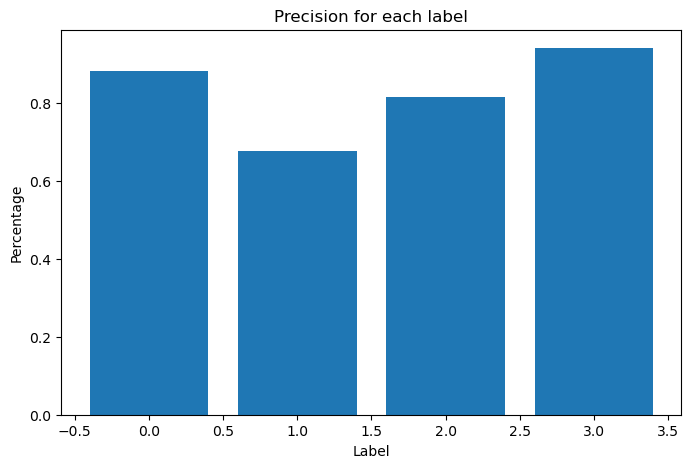

In [23]:
category_amt = 4
precision = np.zeros(category_amt)

for i in range(category_amt):
    precision[i] = metrics.precision_score(y_test, prediction, average=None)[i]

plt.figure(figsize=[8,5])
plt.bar(np.arange(0,category_amt,1), precision)
plt.title(f"Precision for each label")
plt.ylabel("Percentage")
plt.xlabel("Label")
plt.plot()

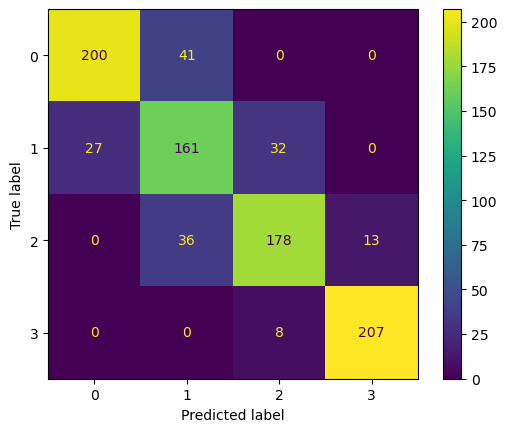

In [24]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)

figure = metrics.ConfusionMatrixDisplay(confusionMatrix)
figure.plot()

0 -> bottom 25%<br>
1 -> bottom 50%<br>
2 -> top 50%<br>
3 -> top 25%<br>